In [1]:
!pip install openpyxl

In [2]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set visualization styles
sns.set(style="whitegrid")


In [5]:
import pandas as pd

df = pd.read_excel("/content/data.xlsx", engine='openpyxl')
df.head()


,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by,New,PendingS
0,0,405-8078784-5731545,4/30/2022,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,False,Easy Ship,NaN,NaN
1,1,171-9198151-1101146,4/30/2022,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,3XL,Shipped,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,False,Easy Ship,NaN,NaN
2,2,404-0687676-7273146,4/30/2022,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,True,NaN,NaN,NaN
3,3,403-9615377-8133951,4/30/2022,Cancelled,Merchant,Amazon.in,Standard,Blazzer,L,On the Way,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,False,Easy Ship,NaN,NaN
4,4,407-1069790-7240320,4/30/2022,Shipped,Amazon,Amazon.in,Expedited,Trousers,3XL,Shipped,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,False,NaN,NaN,NaN


**Preprocessing and Explore Data**

In [6]:
print(df.isnull().sum())
print(df.dtypes)
df.describe(include='all')


index                      0
Order ID                   0
Date                       0
Status                     0
Fulfilment                 0
Sales Channel              0
ship-service-level         0
Category                   0
Size                       0
Courier Status             0
Qty                        0
currency                7800
Amount                  7800
ship-city                 35
ship-state                35
ship-postal-code          35
ship-country              35
B2B                        0
fulfilled-by           89713
New                   128976
PendingS              128976
dtype: int64
index                   int64
Order ID               object
Date                   object
Status                 object
Fulfilment             object
Sales Channel          object
ship-service-level     object
Category               object
Size                   object
Courier Status         object
Qty                     int64
currency               object
Amount            

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by,New,PendingS
count,128976.000000,128976,128976,128976,128976,128976,128976,128976,128976,128976,...,121176,121176.000000,128941,128941,128941.000000,128941,128976,39263,0.0,0.0
unique,NaN,120229,91,13,2,2,2,9,11,4,...,1,NaN,8948,69,NaN,1,2,1,NaN,NaN
top,NaN,403-4984515-8861958,5/3/2022,Shipped,Amazon,Amazon.in,Expedited,T-shirt,M,Shipped,...,INR,NaN,BENGALURU,MAHARASHTRA,NaN,IN,False,Easy Ship,NaN,NaN
freq,NaN,12,2085,77815,89713,128852,88630,50292,22373,109486,...,121176,NaN,11208,22272,NaN,128941,128104,39263,NaN,NaN
mean,64486.130427,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,648.562176,NaN,NaN,463945.677744,NaN,NaN,NaN,NaN,NaN
std,37232.897832,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,281.185041,NaN,NaN,191458.488954,NaN,NaN,NaN,NaN,NaN
min,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.000000,NaN,NaN,110001.000000,NaN,NaN,NaN,NaN,NaN
25%,32242.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,449.000000,NaN,NaN,382421.000000,NaN,NaN,NaN,NaN,NaN
50%,64486.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,605.000000,NaN,NaN,500033.000000,NaN,NaN,NaN,NaN,NaN
75%,96730.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,788.000000,NaN,NaN,600024.000000,NaN,NaN,NaN,NaN,NaN


In [8]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')


In [9]:
df['Amount'] = df['Amount'].astype(str).str.replace(r'[^\d.]', '', regex=True)
df['Amount'] = pd.to_numeric(df['Amount'], errors='coerce')


In [10]:

df = df.dropna(subset=['Amount', 'Date'])


In [11]:
df['Month'] = df['Date'].dt.to_period('M')
monthly_sales = df.groupby('Month')['Amount'].sum().reset_index()
monthly_sales['Month'] = monthly_sales['Month'].astype(str)

**Sales Overview**

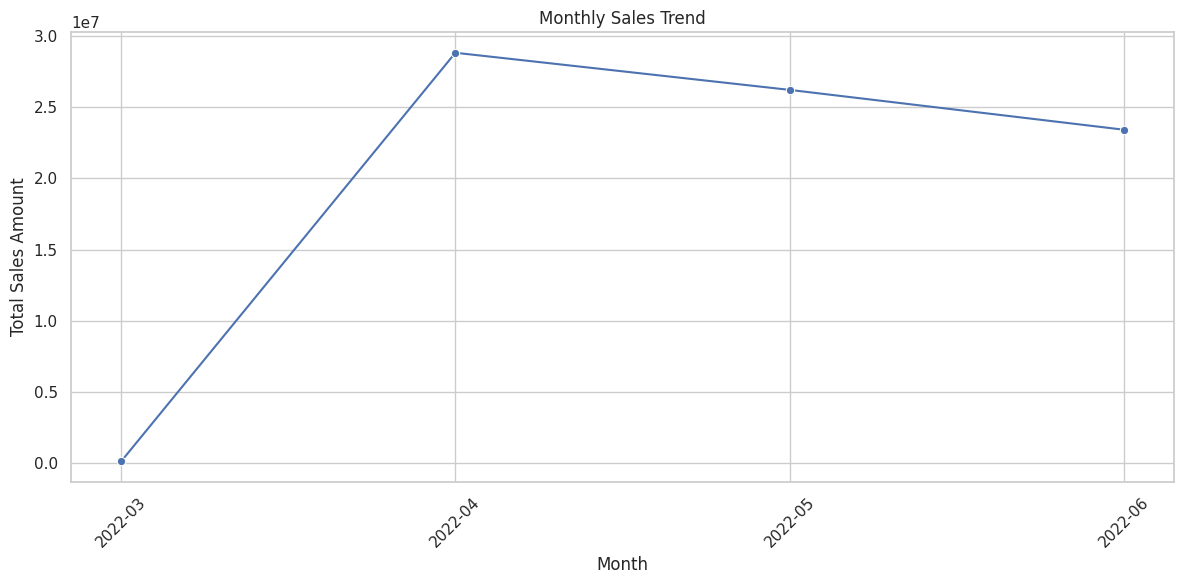

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))
sns.lineplot(x='Month', y='Amount', data=monthly_sales, marker='o')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales Amount')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


**Product Analysis**

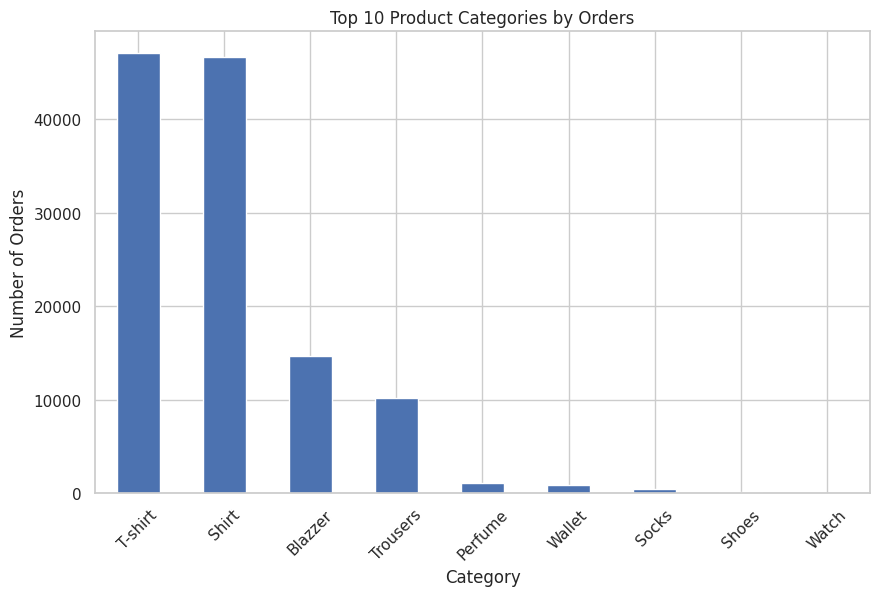

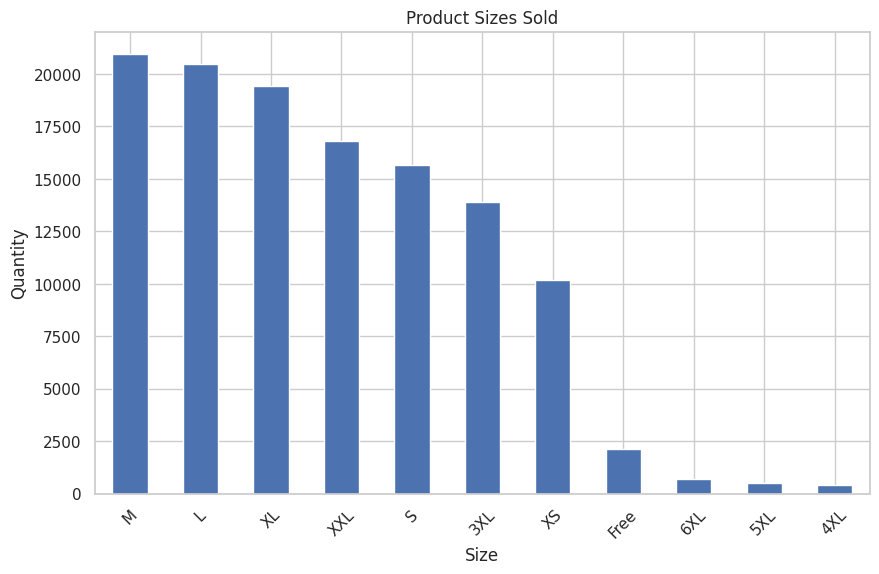

In [13]:

plt.figure(figsize=(10,6))
df['Category'].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 Product Categories by Orders')
plt.xlabel('Category')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.show()


plt.figure(figsize=(10,6))
df['Size'].value_counts().plot(kind='bar')
plt.title('Product Sizes Sold')
plt.xlabel('Size')
plt.ylabel('Quantity')
plt.xticks(rotation=45)
plt.show()


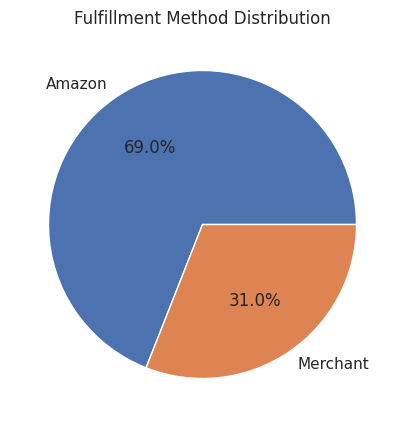

In [14]:
plt.figure(figsize=(7,5))
df['Fulfilment'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Fulfillment Method Distribution')
plt.ylabel('')
plt.show()


**Customer Segmentation**

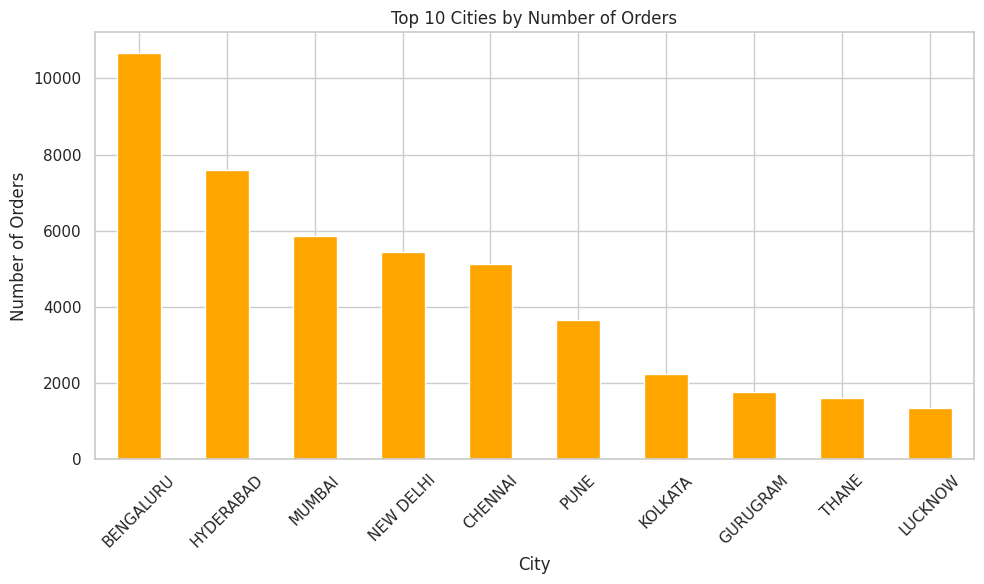

In [17]:

top_customers = df['ship-city'].value_counts().head(10)

import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
top_customers.plot(kind='bar', color='orange')
plt.title('Top 10 Cities by Number of Orders')
plt.xlabel('City')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


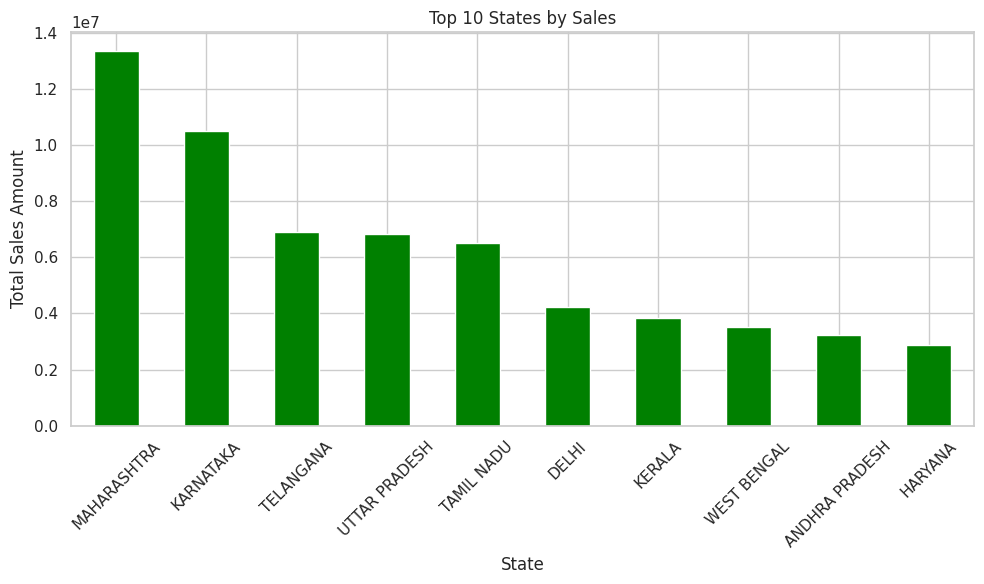

In [22]:
import matplotlib.pyplot as plt

# Clean column names first
df.columns = df.columns.str.strip()

# Check if 'Ship-to State' column exists
if 'ship-state' in df.columns:
    state_sales = df.groupby('ship-state')['Amount'].sum().sort_values(ascending=False).head(10)

    plt.figure(figsize=(10,6))
    state_sales.plot(kind='bar', color='green')
    plt.title('Top 10 States by Sales')
    plt.ylabel('Total Sales Amount')
    plt.xlabel('State')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
else:
    print("Column 'Ship-to State' not found. Found columns are:", df.columns.tolist())


In [23]:
print("✅ Insights:")
print("""
1. Sales peaked during certain months — consider promotions during those times.
2. Certain categories and sizes are more popular — prioritize their inventory.
3. FBA fulfillment is faster and more used — optimize this method.
4. Sales are concentrated in top cities and states — focus marketing there.
""")

print("✅ Recommendations:")
print("""
1. Optimize inventory based on top-selling categories and sizes.
2. Increase marketing in top-performing cities/states.
3. Analyze return/cancellation trends if 'Status' is available.
4. Improve fulfillment time by analyzing delay patterns.
""")


✅ Insights:

1. Sales peaked during certain months — consider promotions during those times.
2. Certain categories and sizes are more popular — prioritize their inventory.
3. FBA fulfillment is faster and more used — optimize this method.
4. Sales are concentrated in top cities and states — focus marketing there.

✅ Recommendations:

1. Optimize inventory based on top-selling categories and sizes.
2. Increase marketing in top-performing cities/states.
3. Analyze return/cancellation trends if 'Status' is available.
4. Improve fulfillment time by analyzing delay patterns.

